# Objectives :
    * Predict whether or not a student will pass the final exam based on certain information given details
    * Find out what most affects student achievement

In [1]:
# Based on the provided column names, here is the full meaning or description of each column in the dataset:

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# loading the dataset
df = pd.read_csv('df_final_port_mat.csv')

# Exploratory Data Analysis (EDA)

In [4]:
# Checking the first few rows of the DataFrame
df.head()

Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
0           0     GP   M   18       R     GT3       T     2     2  services   
1           1     GP   M   15       R     GT3       T     3     2     other   
2           2     GP   M   16       U     LE3       T     1     2     other   
3           3     GP   M   17       U     GT3       T     1     3   at_home   
4           4     GP   M   16       U     GT3       T     3     2  services   

   ... absences_mat G1_mat G2_mat  G3_mat  failures_por  paid_por  \
0  ...          0.0    7.0    4.0     0.0           NaN       NaN   
1  ...          6.0    5.0    9.0     7.0           NaN       NaN   
2  ...          0.0    7.0    0.0     0.0           NaN       NaN   
3  ...          2.0   10.0   10.0    10.0           NaN       NaN   
4  ...         16.0   12.0   11.0    12.0           NaN       NaN   

  absences_por G1_por G2_por G3_por  
0          NaN    NaN    NaN    NaN  
1          NaN    NaN    NaN    NaN  
2          NaN    NaN    NaN    NaN  
3          NaN    NaN    NaN    NaN  
4          NaN    NaN    NaN    NaN  

[5 rows x 40 columns]

In [5]:
# Checking the last few tail of the DataFrame
df.tail()

Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
669         669     MS   F   19       R     GT3       T     2     3  services   
670         670     MS   F   18       U     LE3       T     3     1   teacher   
671         671     MS   F   18       U     GT3       T     1     1     other   
672         672     MS   M   17       U     LE3       T     3     1  services   
673         673     MS   M   18       R     LE3       T     3     2  services   

     ... absences_mat G1_mat G2_mat  G3_mat  failures_por  paid_por  \
669  ...          0.0    7.0    5.0     0.0           1.0        no   
670  ...          0.0    7.0    9.0     8.0           0.0        no   
671  ...          0.0    6.0    5.0     0.0           0.0        no   
672  ...          3.0   14.0   16.0    16.0           0.0        no   
673  ...          0.0   11.0   12.0    10.0           0.0        no   

    absences_por G1_por G2_por G3_por  
669          4.0   10.0   11.0   10.0  
670          4.0   15.0   15.0   16.0  
671          6.0   11.0   12.0    9.0  
672          6.0   10.0   10.0   10.0  
673          4.0   10.0   11.0   11.0  

[5 rows x 40 columns]

In [6]:
# Checking the shape of the DataFrame
print(df.shape)

(674, 40)


In [7]:
# Descriptive statistics
print(df.describe())

       Unnamed: 0         age        Medu        Fedu  traveltime   studytime  \
count  674.000000  674.000000  674.000000  674.000000  674.000000  674.000000   
mean   336.500000   16.808605    2.495549    2.295252    1.565282    1.930267   
std    194.711325    1.264623    1.133370    1.097237    0.745096    0.824695   
min      0.000000   15.000000    0.000000    0.000000    1.000000    1.000000   
25%    168.250000   16.000000    2.000000    1.000000    1.000000    1.000000   
50%    336.500000   17.000000    2.000000    2.000000    1.000000    2.000000   
75%    504.750000   18.000000    4.000000    3.000000    2.000000    2.000000   
max    673.000000   22.000000    4.000000    4.000000    4.000000    4.000000   

       failures_mat      famrel    freetime       goout  ...      health  \
count    395.000000  674.000000  674.000000  674.000000  ...  674.000000   
mean       0.334177    3.936202    3.188427    3.178042  ...    3.532641   
std        0.743651    0.945983    1.05641

In [8]:
# to get the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    674 non-null    int64  
 1   school        674 non-null    object 
 2   sex           674 non-null    object 
 3   age           674 non-null    int64  
 4   address       674 non-null    object 
 5   famsize       674 non-null    object 
 6   Pstatus       674 non-null    object 
 7   Medu          674 non-null    int64  
 8   Fedu          674 non-null    int64  
 9   Mjob          674 non-null    object 
 10  Fjob          674 non-null    object 
 11  reason        674 non-null    object 
 12  guardian      674 non-null    object 
 13  traveltime    674 non-null    int64  
 14  studytime     674 non-null    int64  
 15  failures_mat  395 non-null    float64
 16  schoolsup     674 non-null    object 
 17  famsup        674 non-null    object 
 18  paid_mat      395 non-null    

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Unnamed: 0        0
school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian          0
traveltime        0
studytime         0
failures_mat    279
schoolsup         0
famsup            0
paid_mat        279
activities        0
nursery           0
higher            0
internet          0
romantic          0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences_mat    279
G1_mat          279
G2_mat          279
G3_mat          279
failures_por     25
paid_por         25
absences_por     25
G1_por           25
G2_por           25
G3_por           25
dtype: int64

In [10]:
# to get the unique values
df.nunique()

Unnamed: 0      674
school            2
sex               2
age               8
address           2
famsize           2
Pstatus           2
Medu              5
Fedu              5
Mjob              5
Fjob              5
reason            4
guardian          3
traveltime        4
studytime         4
failures_mat      4
schoolsup         2
famsup            2
paid_mat          2
activities        2
nursery           2
higher            2
internet          2
romantic          2
famrel            5
freetime          5
goout             5
Dalc              5
Walc              5
health            5
absences_mat     34
G1_mat           17
G2_mat           17
G3_mat           18
failures_por      4
paid_por          2
absences_por     24
G1_por           17
G2_por           16
G3_por           17
dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures_mat', 'schoolsup', 'famsup', 'paid_mat',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat',
       'G2_mat', 'G3_mat', 'failures_por', 'paid_por', 'absences_por',
       'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
# Handling missing values
# Assuming 'failures_mat', 'paid_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat', 
# 'failures_por', 'paid_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por' are numeric columns,
# we can fill the missing values with 0 or any other appropriate value.
# Fill missing values with 0 for the specified columns
numeric_cols = ['failures_mat', 'paid_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
                'failures_por', 'paid_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por']
df[numeric_cols] = df[numeric_cols].fillna(0)

In [14]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0      0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures_mat    0
schoolsup       0
famsup          0
paid_mat        0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_mat    0
G1_mat          0
G2_mat          0
G3_mat          0
failures_por    0
paid_por        0
absences_por    0
G1_por          0
G2_por          0
G3_por          0
dtype: int64


# Data Visualization and EDA (after handling missing values)

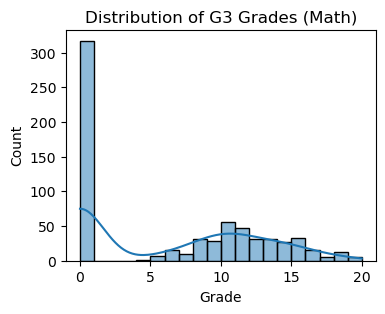

In [15]:
#Distribution of grades (G3) using a histogram
plt.figure(figsize=(4, 3))
sns.histplot(df['G3_mat'], bins=20, kde=True)
plt.title('Distribution of G3 Grades (Math)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

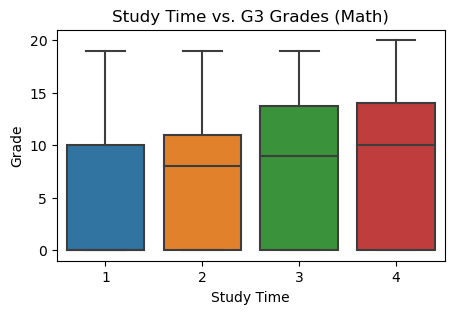

In [16]:
# Box plot of study time vs. grades (G3) for Math
plt.figure(figsize=(5, 3))
sns.boxplot(x='studytime', y='G3_mat', data=df)
plt.title('Study Time vs. G3 Grades (Math)')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

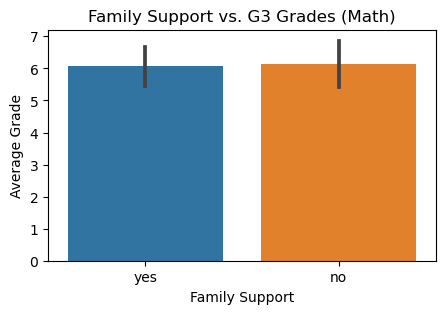

In [17]:
#Bar plot of family support vs. average grades (G3) for Math and Portuguese
plt.figure(figsize=(5, 3))
sns.barplot(x='famsup', y='G3_mat', data=df)
plt.title('Family Support vs. G3 Grades (Math)')
plt.xlabel('Family Support')
plt.ylabel('Average Grade')
plt.show()

In [18]:
corr = df.corr()
corr

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_12772\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Unnamed: 0       age      Medu      Fedu  traveltime  studytime  \
Unnamed: 0      1.000000  0.012856  0.217395  0.184852   -0.088547   0.134734   
age             0.012856  1.000000 -0.122407 -0.132690    0.017222   0.001431   
Medu            0.217395 -0.122407  1.000000  0.637315   -0.247752   0.099025   
Fedu            0.184852 -0.132690  0.637315  1.000000   -0.195364   0.044134   
traveltime     -0.088547  0.017222 -0.247752 -0.195364    1.000000  -0.063915   
studytime       0.134734  0.001431  0.099025  0.044134   -0.063915   1.000000   
failures_mat    0.063396  0.151272 -0.093869 -0.114245    0.011388  -0.087585   
famrel         -0.013976 -0.007738  0.022602  0.018175   -0.016217   0.000003   
freetime        0.035429  0.001454 -0.019775  0.000645    0.002283  -0.075289   
goout          -0.012601  0.093700  0.011847  0.035511    0.053314  -0.076707   
Dalc            0.009776  0.133358 -0.017087 -0.006619    0.083390  -0.141876   
Walc            0.048440  0.070508 -0.032870  0.035355    0.055538  -0.216135   
health         -0.009682 -0.012519 -0.000824  0.042472   -0.048552  -0.056459   
absences_mat    0.256353  0.078736  0.178694  0.119405   -0.086619   0.019049   
G1_mat          0.675403 -0.116828  0.305937  0.283693   -0.197791   0.190723   
G2_mat          0.650353 -0.145939  0.310377  0.275487   -0.216944   0.183972   
G3_mat          0.600683 -0.157750  0.310722  0.268023   -0.201968   0.168362   
failures_por   -0.101022  0.282980 -0.162545 -0.158981    0.097723  -0.144968   
absences_por   -0.003288  0.101160  0.004574  0.036979   -0.004565  -0.115154   
G1_por          0.385970 -0.290844  0.253420  0.200063   -0.104590   0.202554   
G2_por          0.372622 -0.238176  0.258150  0.207984   -0.107292   0.189979   
G3_por          0.325474 -0.232396  0.242047  0.200457   -0.089204   0.202408   

              failures_mat    famrel  freetime     goout  ...    health  \
Unnamed: 0        0.063396 -0.013976  0.035429 -0.012601  ... -0.009682   
age               0.151272 -0.007738  0.001454  0.093700  ... -0.012519   
Medu             -0.093869  0.022602 -0.019775  0.011847  ... -0.000824   
Fedu             -0.114245  0.018175  0.000645  0.035511  ...  0.042472   
traveltime        0.011388 -0.016217  0.002283  0.053314  ... -0.048552   
studytime        -0.087585  0.000003 -0.075289 -0.076707  ... -0.056459   
failures_mat      1.000000 -0.028051  0.078661  0.067776  ...  0.051903   
famrel           -0.028051  1.000000  0.136943  0.092504  ...  0.108261   
freetime          0.078661  0.136943  1.000000  0.338296  ...  0.085625   
goout             0.067776  0.092504  0.338296  1.000000  ... -0.006144   
Dalc              0.089907 -0.070799  0.115340  0.245031  ...  0.065793   
Walc              0.107898 -0.085716  0.124526  0.391986  ...  0.119352   
health            0.051903  0.108261  0.085625 -0.006144  ...  1.000000   
absences_mat      0.171730 -0.024971 -0.016051 -0.000091  ... -0.012616   
G1_mat            0.105920  0.016088  0.051815 -0.110423  ... -0.006817   
G2_mat            0.080571  0.002610  0.041763 -0.118778  ... -0.018790   
G3_mat            0.034417  0.029428  0.048378 -0.113071  ... -0.010708   
failures_por      0.205437 -0.064089  0.103309  0.046653  ...  0.036017   
absences_por      0.066912 -0.092238 -0.023976  0.088039  ... -0.027657   
G1_por           -0.286349  0.019111 -0.096610 -0.038475  ... -0.031956   
G2_por           -0.302102  0.052380 -0.106614 -0.044222  ... -0.056832   
G3_por           -0.325968  0.033919 -0.120446 -0.053340  ... -0.072358   

              absences_mat    G1_mat    G2_mat    G3_mat  failures_por  \
Unnamed: 0        0.256353  0.675403  0.650353  0.600683     -0.101022   
age               0.078736 -0.116828 -0.145939 -0.157750      0.282980   
Medu              0.178694  0.305937  0.310377  0.310722     -0.162545   
Fedu              0.119405  0.283693  0.275487  0.268023     -0.158981   
traveltime       -0.086619 -0.197791 -0.216944 -0.2019

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_12772\3704507324.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


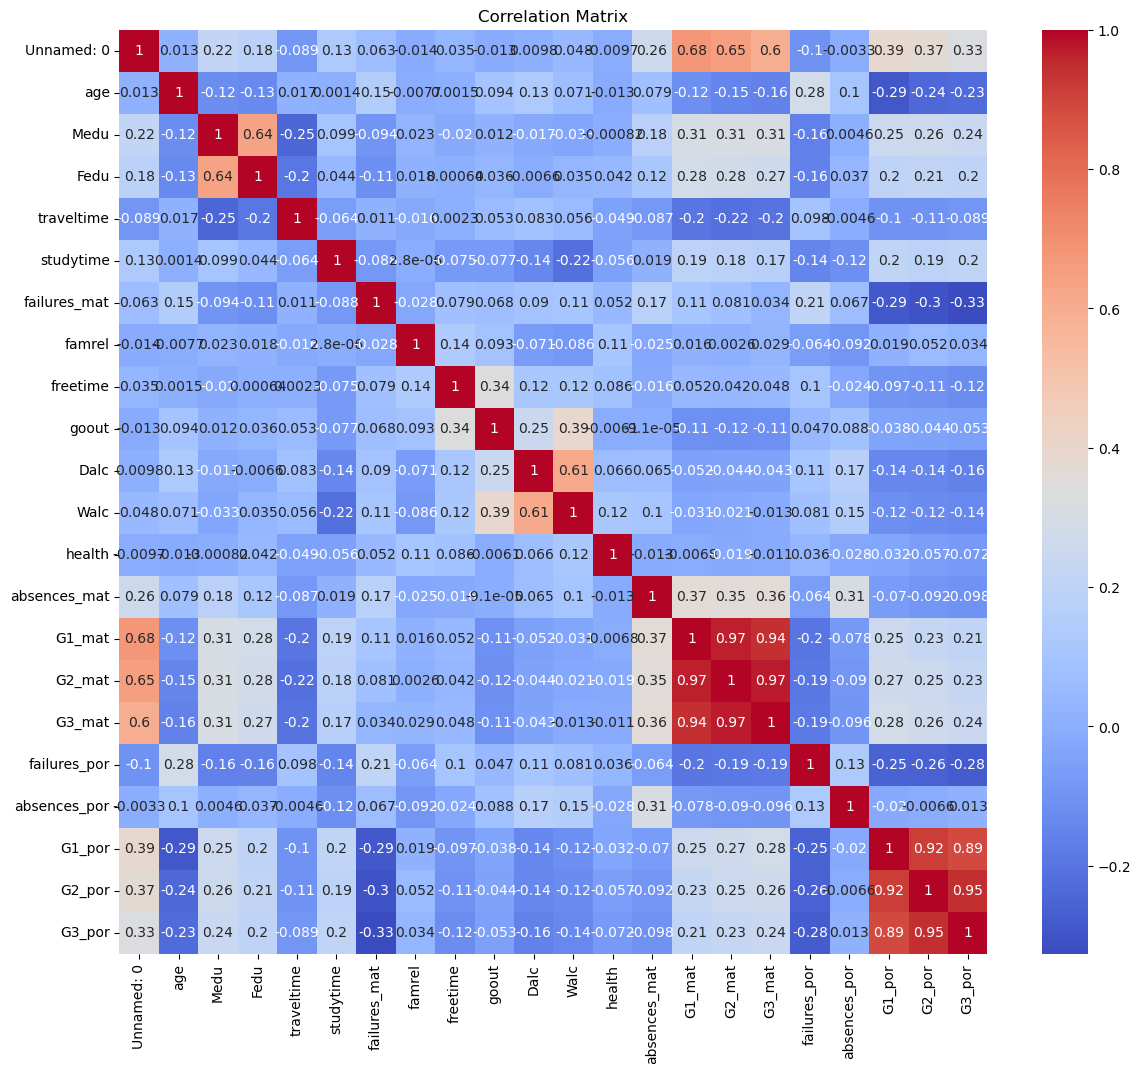

In [19]:
# Correlation Analysis (if required)
# e.g., calculate correlation coefficients and visualize using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

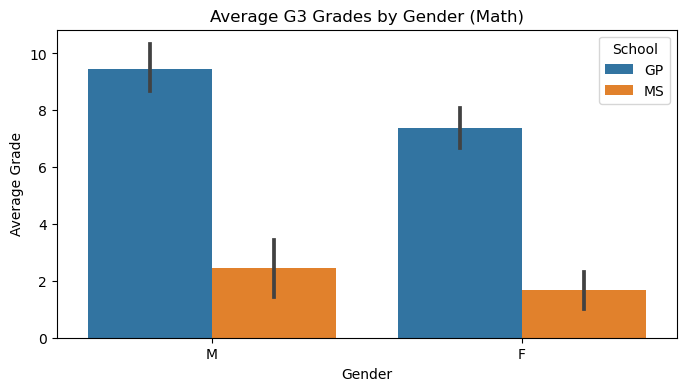

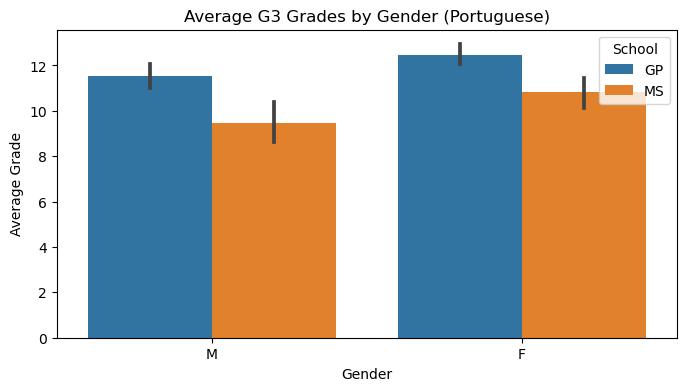

In [20]:
#Comparison of average grades (G3) between male and female students for Math and Portuguese
plt.figure(figsize=(8, 4))
sns.barplot(x='sex', y='G3_mat', data=df, hue='school')
plt.title('Average G3 Grades by Gender (Math)')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.legend(title='School', loc='best')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='sex', y='G3_por', data=df, hue='school')
plt.title('Average G3 Grades by Gender (Portuguese)')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.legend(title='School', loc='best')
plt.show()

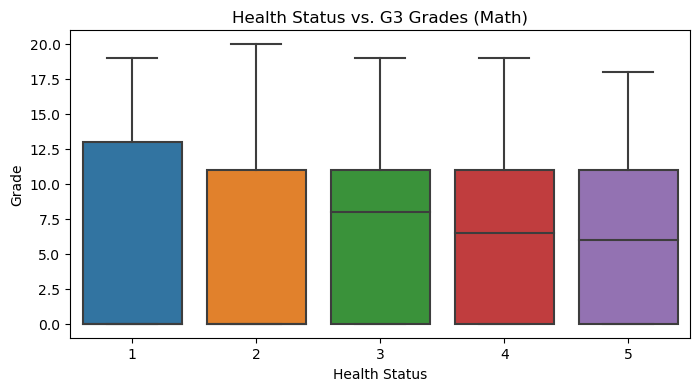

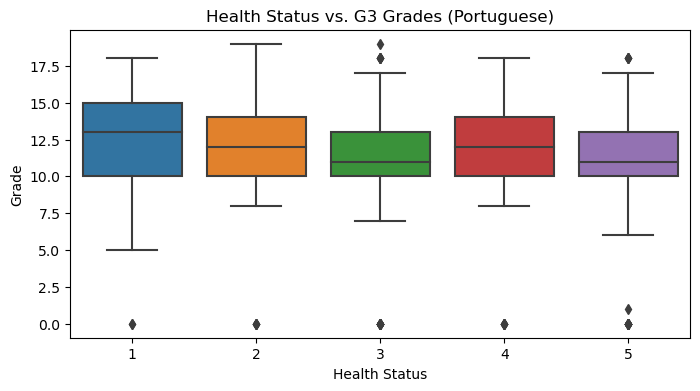

In [21]:
#Comparison of health status with average grades (G3) for Math and Portuguese
plt.figure(figsize=(8, 4))
sns.boxplot(x='health', y='G3_mat', data=df)
plt.title('Health Status vs. G3 Grades (Math)')
plt.xlabel('Health Status')
plt.ylabel('Grade')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='health', y='G3_por', data=df)
plt.title('Health Status vs. G3 Grades (Portuguese)')
plt.xlabel('Health Status')
plt.ylabel('Grade')
plt.show()

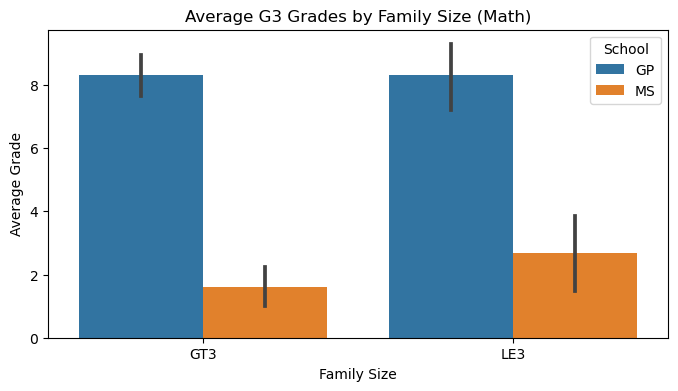

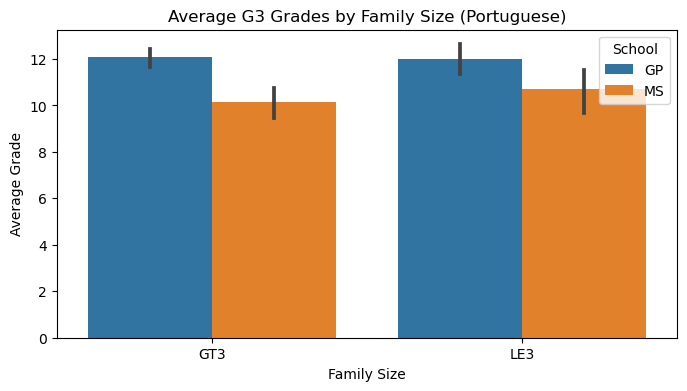

In [22]:
#Comparison of average grades (G3) based on family size for Math and Portuguese
plt.figure(figsize=(8, 4))
sns.barplot(x='famsize', y='G3_mat', data=df, hue='school')
plt.title('Average G3 Grades by Family Size (Math)')
plt.xlabel('Family Size')
plt.ylabel('Average Grade')
plt.legend(title='School', loc='best')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='famsize', y='G3_por', data=df, hue='school')
plt.title('Average G3 Grades by Family Size (Portuguese)')
plt.xlabel('Family Size')
plt.ylabel('Average Grade')
plt.legend(title='School', loc='best')
plt.show()

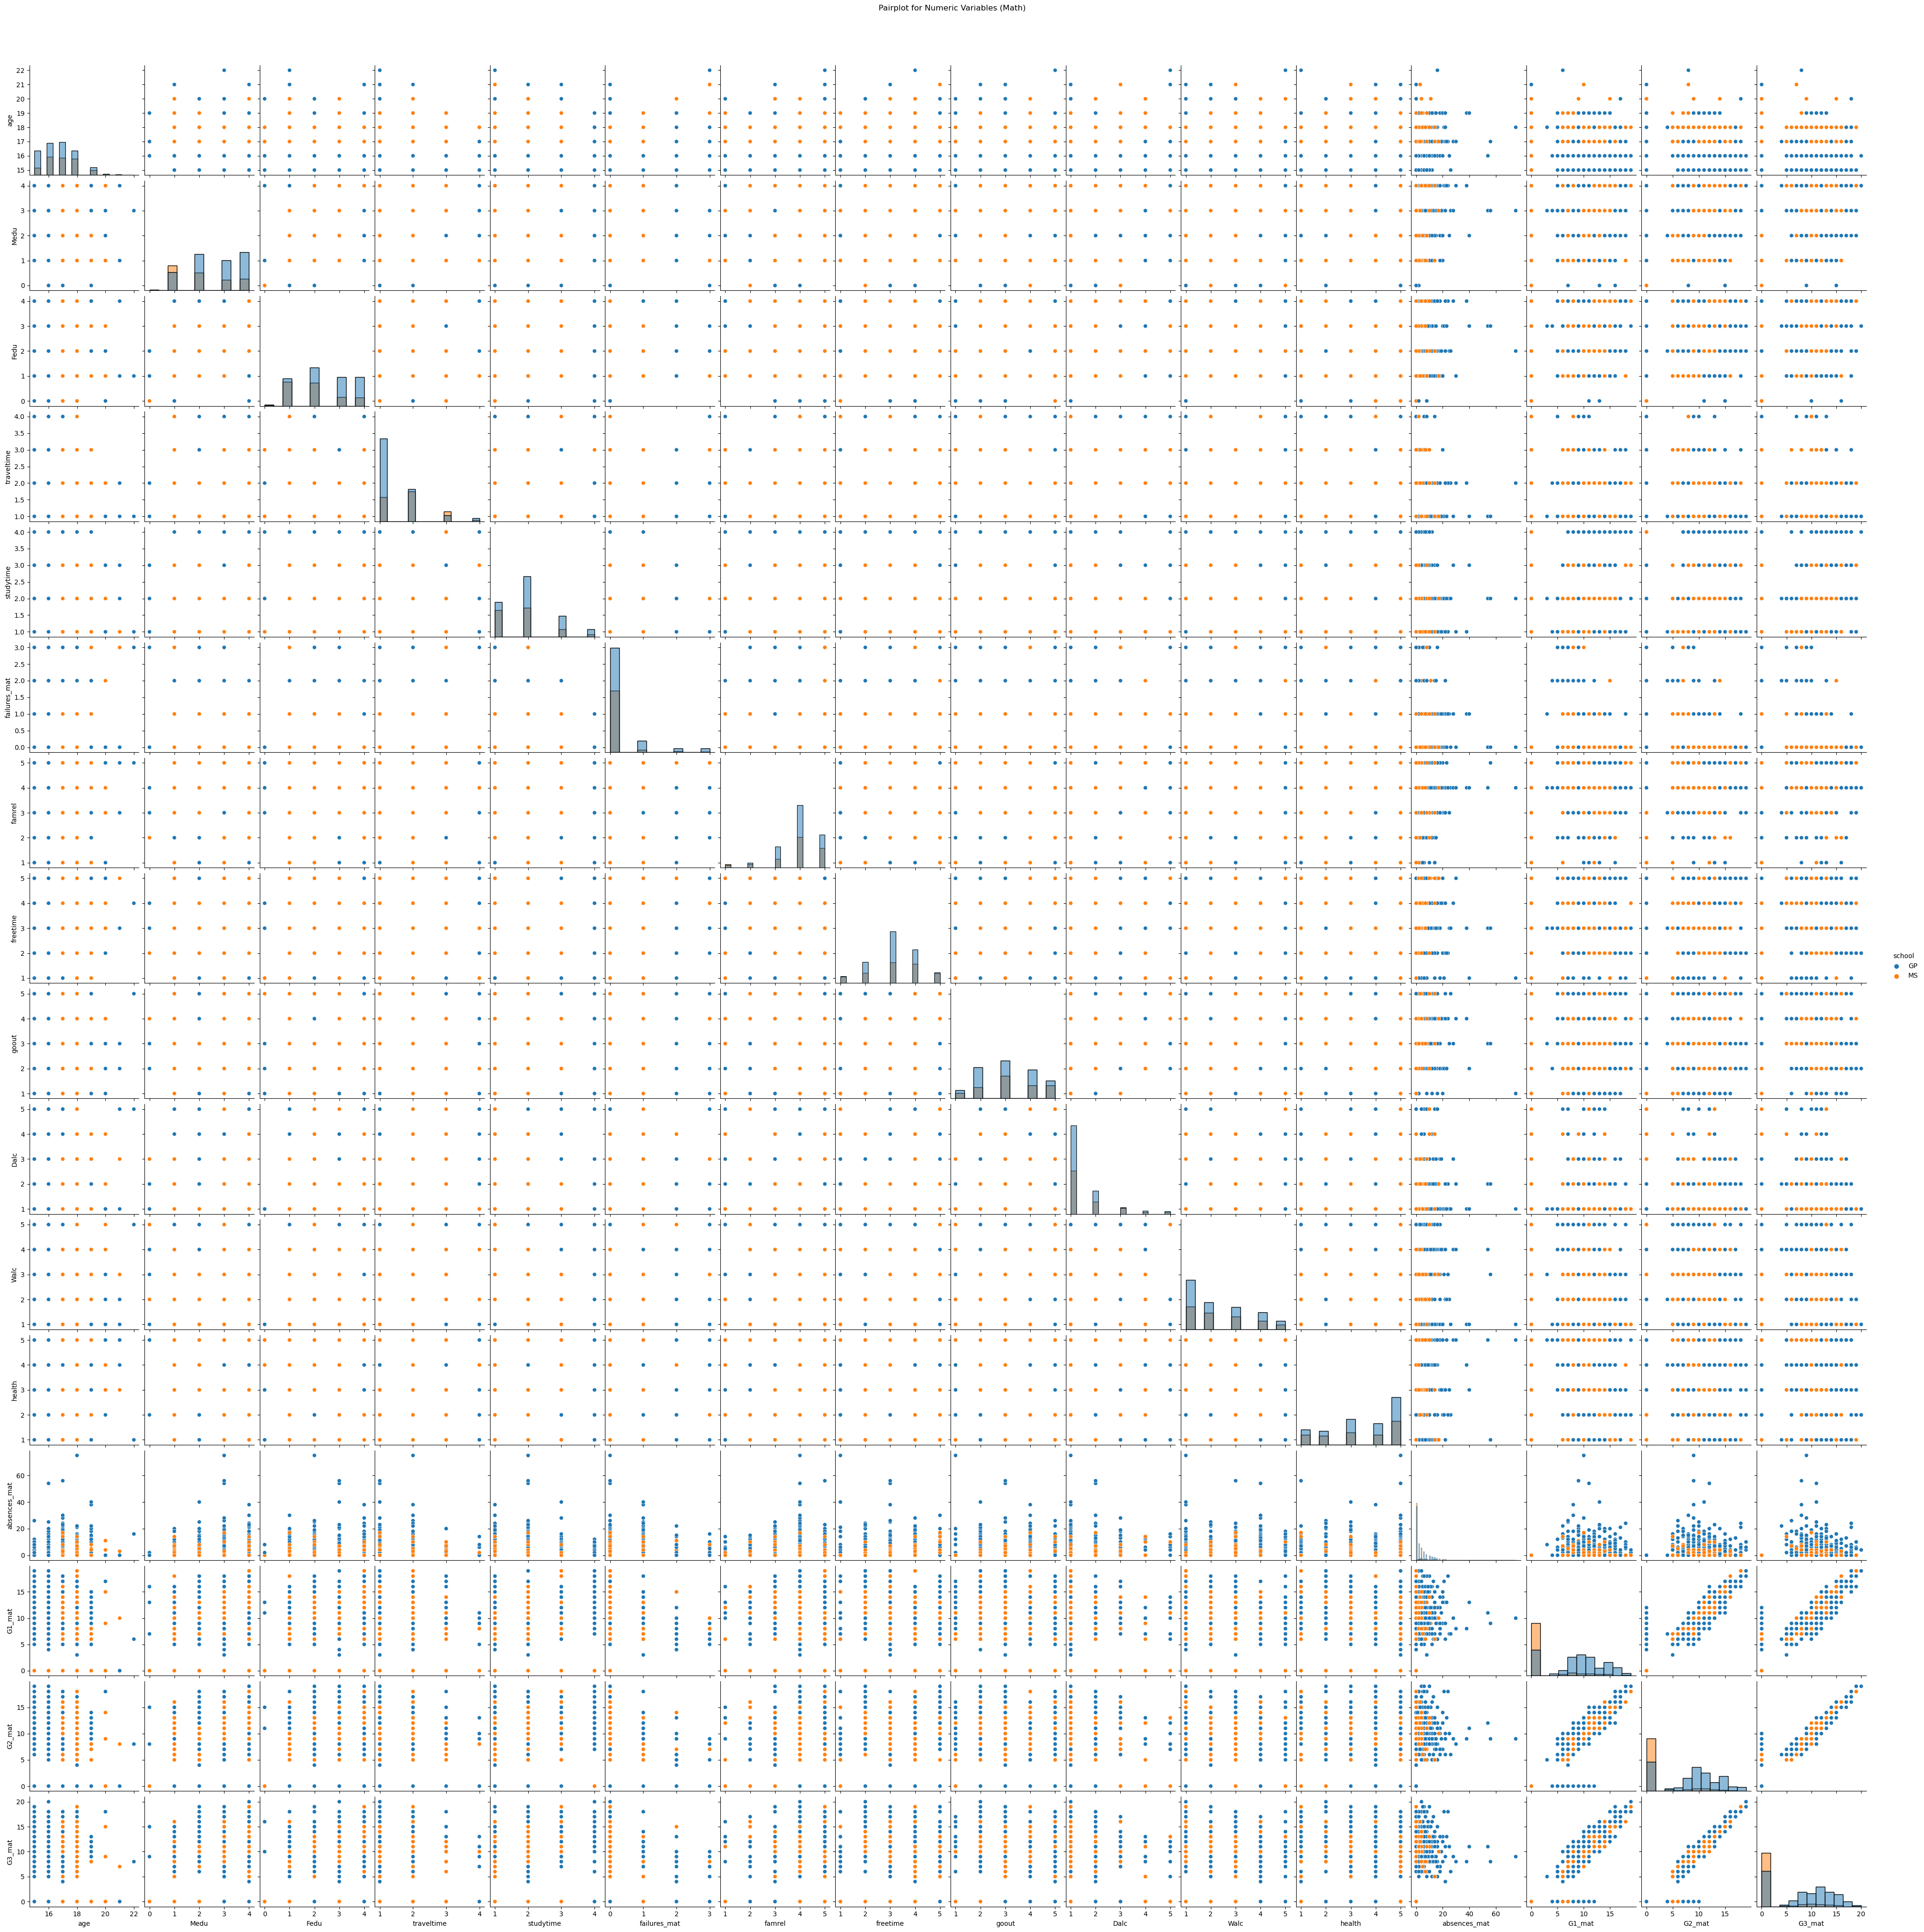

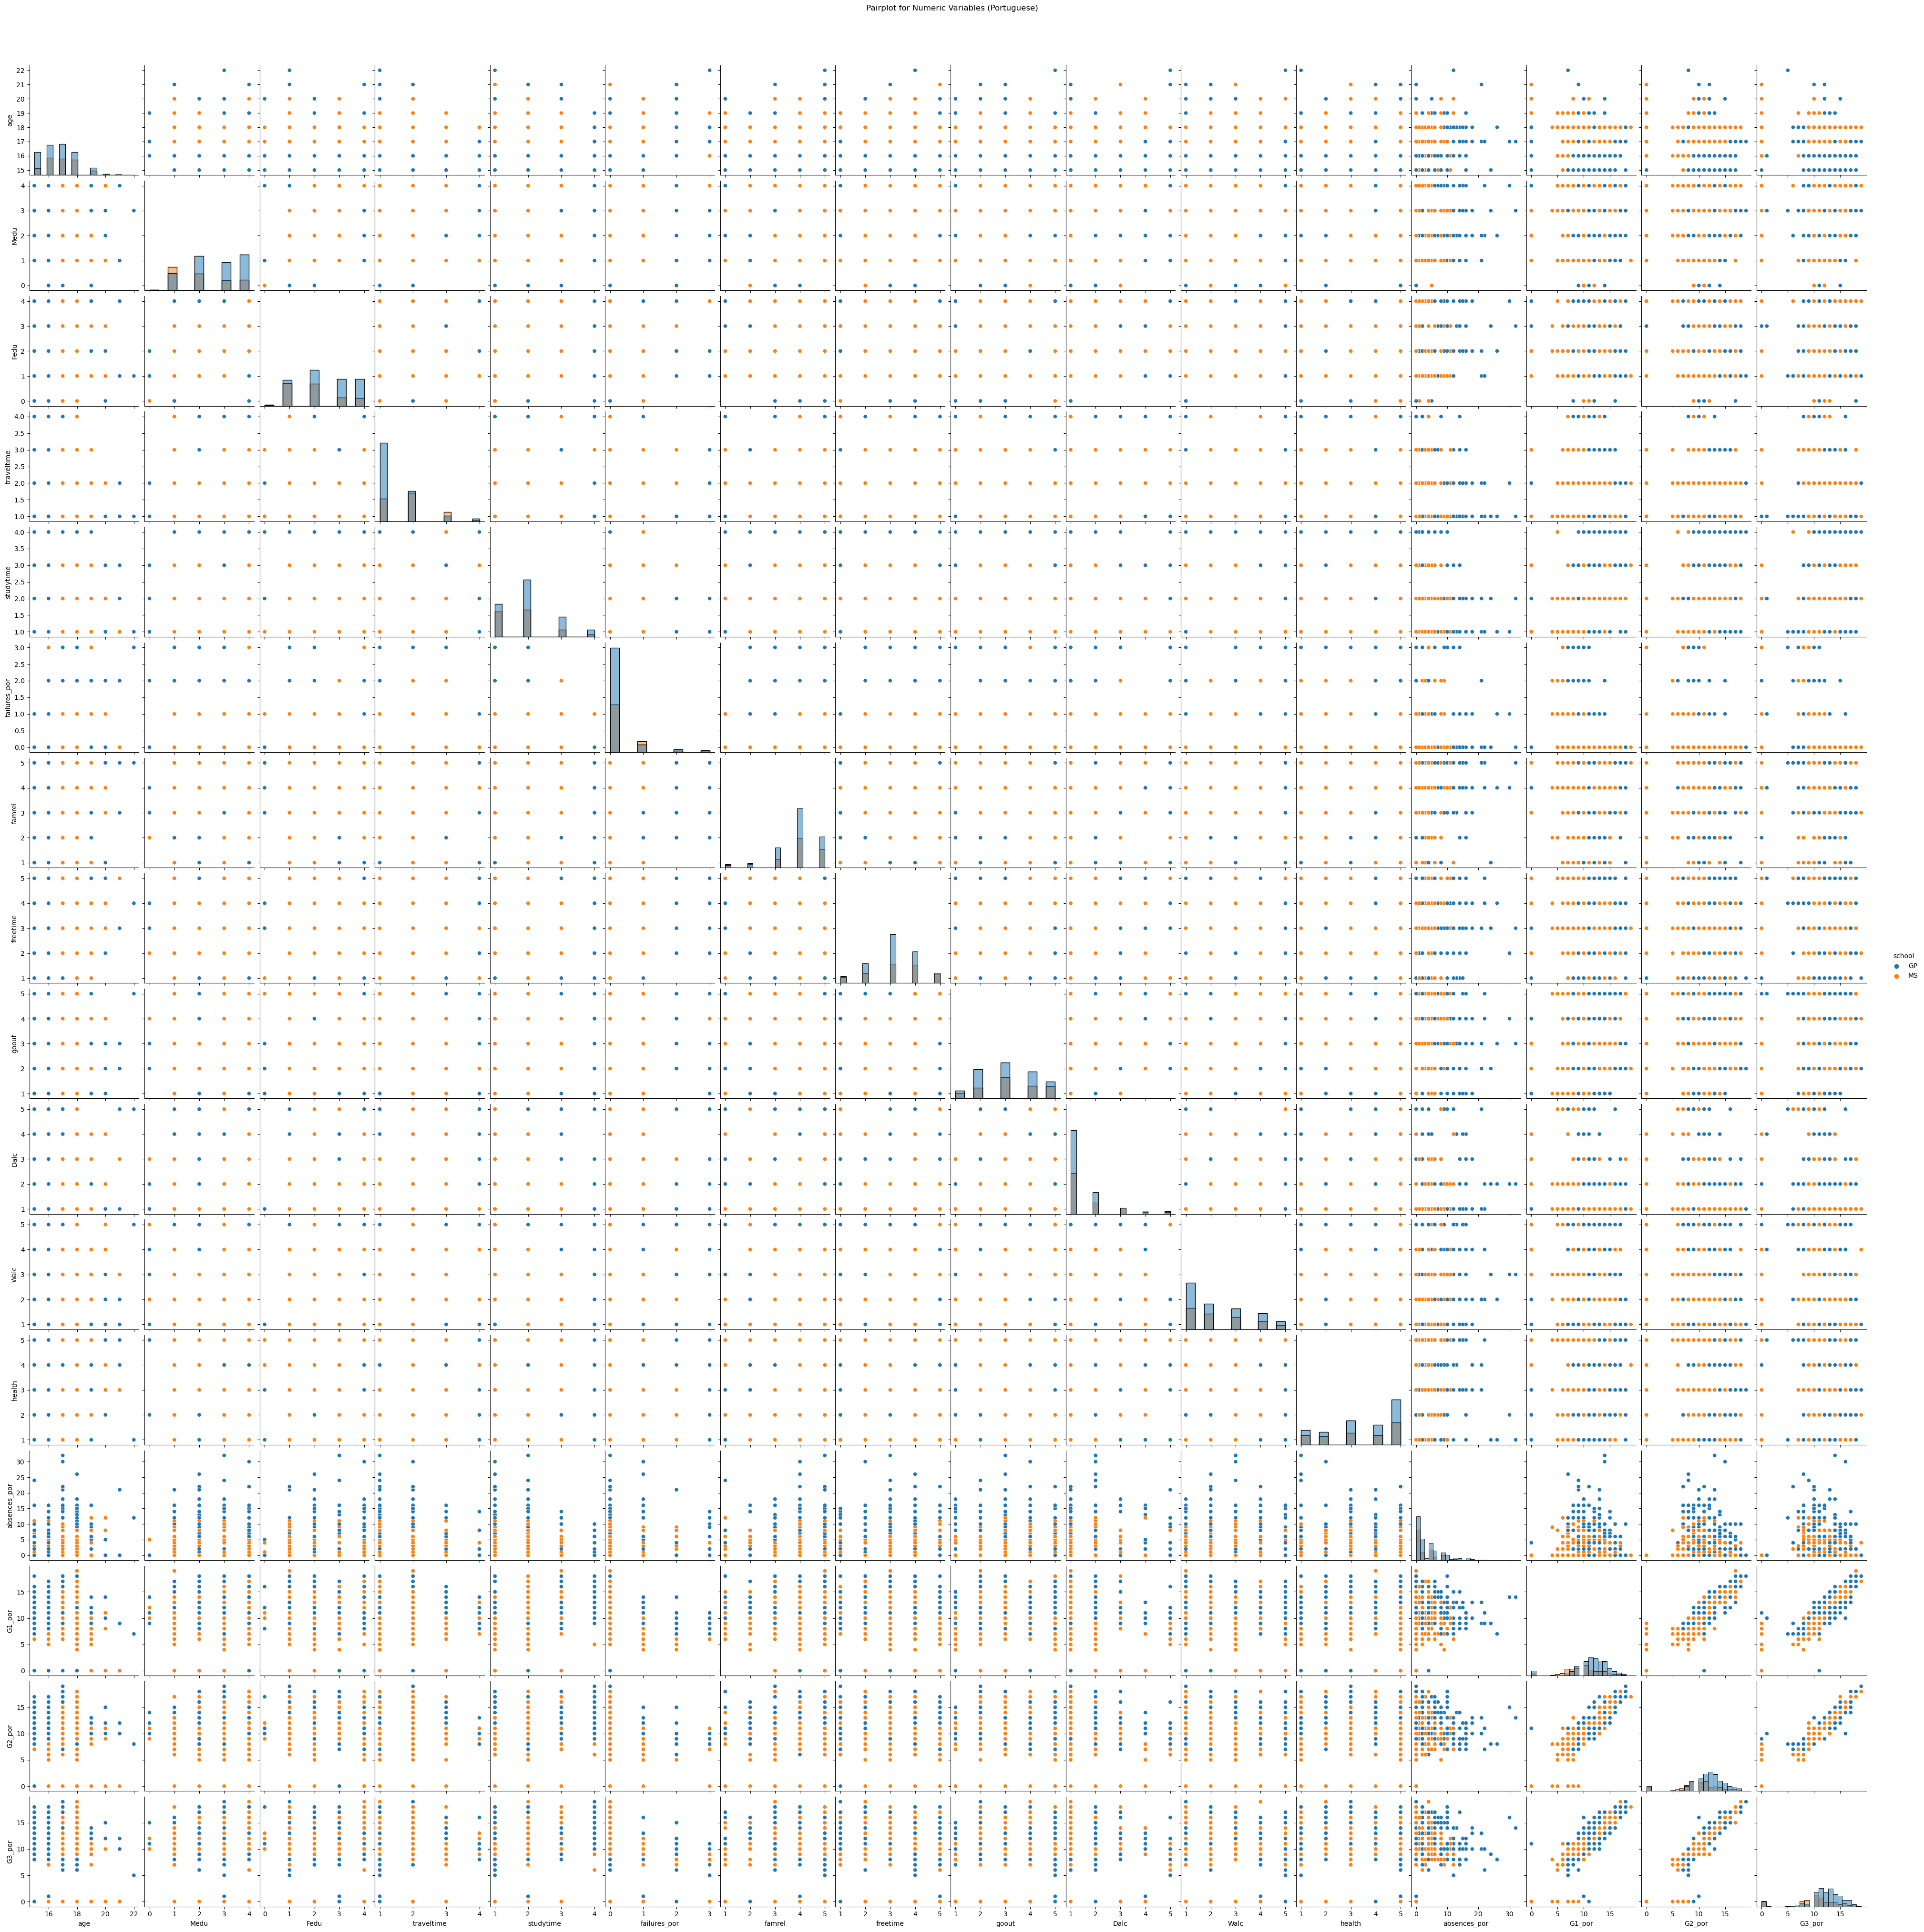

In [23]:
# Example: Pairplot to visualize the relationship between numeric variables
sns.pairplot(df, vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures_mat', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat'], hue='school', diag_kind='hist')
plt.suptitle('Pairplot for Numeric Variables (Math)', y=1.02)
plt.show()

sns.pairplot(df, vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures_por', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_por', 'G1_por', 'G2_por', 'G3_por'], hue='school', diag_kind='hist')
plt.suptitle('Pairplot for Numeric Variables (Portuguese)', y=1.02)
plt.show()

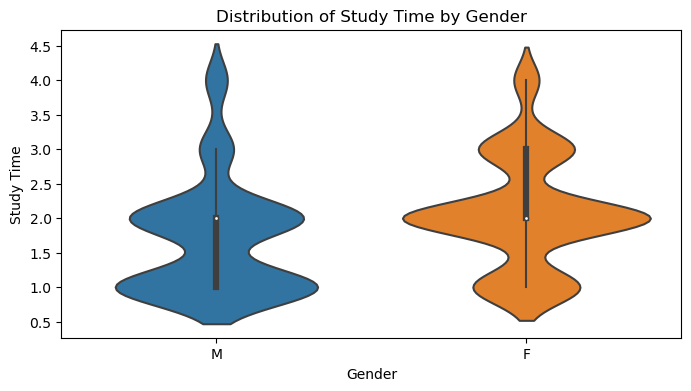

In [24]:
# Violin plot to compare the distribution of study time for male and female students
plt.figure(figsize=(8, 4))
sns.violinplot(x='sex', y='studytime', data=df)
plt.title('Distribution of Study Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Time')
plt.show()

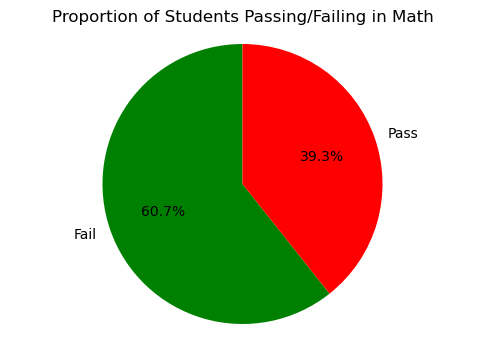

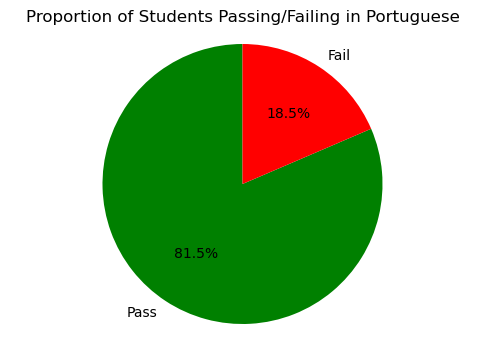

In [25]:
# Define a function to categorize pass and fail
def categorize_pass_fail(grade):
    return 'Pass' if grade >= 10 else 'Fail'

# Count the number of students who pass and fail in Math
pass_fail_math = df['G3_mat'].apply(categorize_pass_fail).value_counts()

# Count the number of students who pass and fail in Portuguese
pass_fail_portuguese = df['G3_por'].apply(categorize_pass_fail).value_counts()

# Create the pie chart for Math
plt.figure(figsize=(6, 4))
plt.pie(pass_fail_math, labels=pass_fail_math.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proportion of Students Passing/Failing in Math')
plt.axis('equal')
plt.show()

# Create the pie chart for Portuguese
plt.figure(figsize=(6, 4))
plt.pie(pass_fail_portuguese, labels=pass_fail_portuguese.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Proportion of Students Passing/Failing in Portuguese')
plt.axis('equal')
plt.show()